In [1]:
import random
import pandas as pd
import numpy as np 
from tabulate import tabulate

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

# 1) Experimentando Diferentes conjuntos de dados

## 1.1) Pré-processamento

In [2]:
def config_ravel(y_train, y_test):
    y_train_ravel = y_train.values.ravel()
    y_test_ravel = y_test.values.ravel()  

    return y_train_ravel, y_test_ravel

## 1.2) Carregar os dados de treinamento e teste

In [3]:
X_train_array = []
y_train_array = []
X_test_array = []
y_test_array = []  

def get_data_from_conjunto(conjunto: int):      

    X_train = pd.read_csv(f'../Dados/ModelosSimples/Conjunto_{conjunto+1}/X_train.csv')
    y_train = pd.read_csv(f'../Dados/ModelosSimples/Conjunto_{conjunto+1}/y_train.csv')
    X_test = pd.read_csv(f'../Dados/ModelosSimples/Conjunto_{conjunto+1}/X_test.csv')
    y_test = pd.read_csv(f'../Dados/ModelosSimples/Conjunto_{conjunto+1}/y_test.csv')

    num_classes = len(np.unique(y_train))
    input = X_train.shape[1]
    
    y_train, y_test = config_ravel(y_train, y_test)

    X_train_array.append(X_train)
    y_train_array.append(y_train)
    X_test_array.append(X_test)
    y_test_array.append(y_test)

    return num_classes, input, X_train_array, y_train_array, X_test_array, y_test_array

## 1.3) Montando rede

In [4]:
def train_naive_bayes(X_train, y_train):

    model = GaussianNB(var_smoothing=1e-9, priors=[0.4, 0.3, 0.3])

    cv_scores = cross_val_predict(model, X_train, y_train, cv=5)

    model.fit(X_train, y_train)

    # Calculando métricas para cada fold
    accuracy = accuracy_score(y_train, cv_scores)
    f1 = f1_score(y_train, cv_scores, average='weighted')  # 'weighted' para lidar com classes desbalanceadas
    recall_per_class = recall_score(y_train, cv_scores, average=None)  # Revocação por classe
    recall_average = sum(recall_per_class) / len(recall_per_class)  # Média da revocação
    precision_per_class = precision_score(y_train, cv_scores, average=None)  # Precisão por classe
    precision_average = sum(precision_per_class) / len(precision_per_class)  # Média da precisão

    return accuracy, f1, recall_average, precision_average, model

## 1.4) Carregando dados e treinando (Cross validation)

In [5]:
conjuntos = 10
resultados_acuracia = []
resultados_precisao = []
resultados_revocacao = []
resultados_f1 = []
best_models = []

for i in range(conjuntos):
    print(f'\nConjunto {i + 1}')
    num_classes, input, X_train_array, y_train_array, X_test_array, y_test_array = get_data_from_conjunto(i)

    media_accuracy, media_f1, media_recall, media_precision, model = train_naive_bayes(X_train_array[i], y_train_array[i])

    print(f'Acurácia: {media_accuracy}')
    print(f'F1: {media_f1}')
    print(f'Revocação: {media_recall}')
    print(f'Precisão: {media_precision}')

    resultados_acuracia.append(media_accuracy)
    resultados_precisao.append(media_precision)
    resultados_revocacao.append(media_recall)
    resultados_f1.append(media_f1)
    best_models.append(model)


Conjunto 1
Acurácia: 0.8557142857142858
F1: 0.855686928253037
Revocação: 0.845759170614734
Precisão: 0.8388647579005055

Conjunto 2
Acurácia: 0.8457142857142858
F1: 0.8448726659349151
Revocação: 0.833879086319544
Precisão: 0.8287516995077501

Conjunto 3


Acurácia: 0.8485714285714285
F1: 0.8485385415455523
Revocação: 0.8365801217101246
Precisão: 0.8294606055189776

Conjunto 4
Acurácia: 0.8485714285714285
F1: 0.8472272815025936
Revocação: 0.8335375544959733
Precisão: 0.8295012454114733

Conjunto 5
Acurácia: 0.8628571428571429
F1: 0.8628034169640972
Revocação: 0.8542030502626243
Precisão: 0.8505994013484903

Conjunto 6
Acurácia: 0.8457142857142858
F1: 0.8464011340126341
Revocação: 0.8338551206658312
Precisão: 0.827365827050825

Conjunto 7
Acurácia: 0.8485714285714285
F1: 0.8471099470234913
Revocação: 0.8343985432801223
Precisão: 0.8328799779523219

Conjunto 8
Acurácia: 0.8742857142857143
F1: 0.8740265902682893
Revocação: 0.8599358506525343
Precisão: 0.8570393475597328

Conjunto 9
Acurácia: 0.8442857142857143
F1: 0.8434992903006194
Revocação: 0.8307662453855184
Precisão: 0.8321975496129822

Conjunto 10
Acurácia: 0.8371428571428572
F1: 0.8357238309975471
Revocação: 0.8290701236628916
Precisão: 0.8241064302187651


## 1.5) Analisando resultados gerais

In [6]:
# Calculate the overall mean
overall_mean_acuracia = sum(resultados_acuracia) / len(resultados_acuracia)
overall_mean_precisao = sum(resultados_precisao) / len(resultados_precisao)
overall_mean_revocacao = sum(resultados_revocacao) / len(resultados_revocacao)
overall_mean_f1 = sum(resultados_f1) / len(resultados_f1)

# Create a DataFrame
data = {
    'Acurácia': [overall_mean_acuracia],
    'Precisão': [overall_mean_precisao],
    'Revocação': [overall_mean_revocacao],
    'F1-Score': [overall_mean_f1]
}

df = pd.DataFrame(data)

# Display the table
print(df)

   Acurácia  Precisão  Revocação  F1-Score
0  0.851143  0.835077   0.839198  0.850589


## 1.6) Matriz de confusao e resultados da predição

----------------------------------------------------------------
Eficácia do conjunto 1


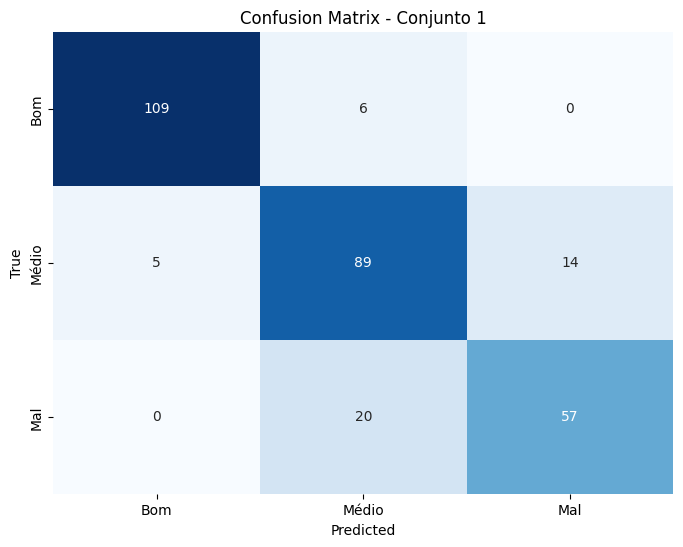

Acurácia no conjunto de teste: 85.00%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bom       0.96      0.95      0.95       115
       Medio       0.77      0.82      0.80       108
        Ruim       0.80      0.74      0.77        77

    accuracy                           0.85       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.85      0.85      0.85       300


----------------------------------------------------------------

Eficácia do conjunto 2


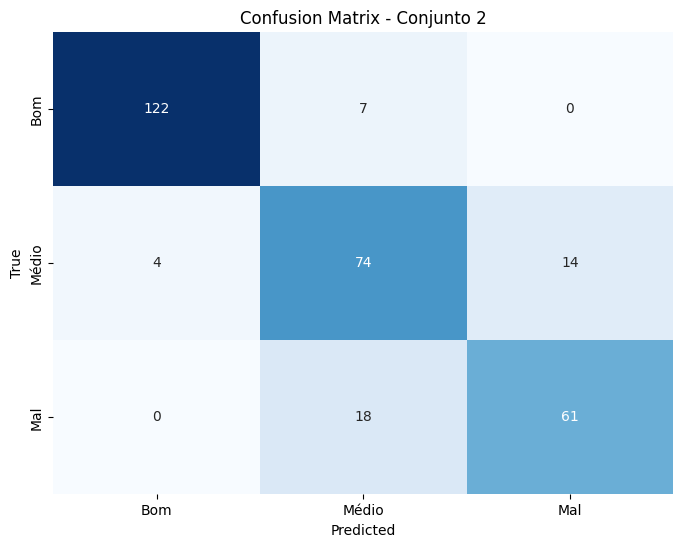

Acurácia no conjunto de teste: 85.67%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bom       0.97      0.95      0.96       129
       Medio       0.75      0.80      0.77        92
        Ruim       0.81      0.77      0.79        79

    accuracy                           0.86       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.86      0.86      0.86       300


----------------------------------------------------------------

Eficácia do conjunto 3


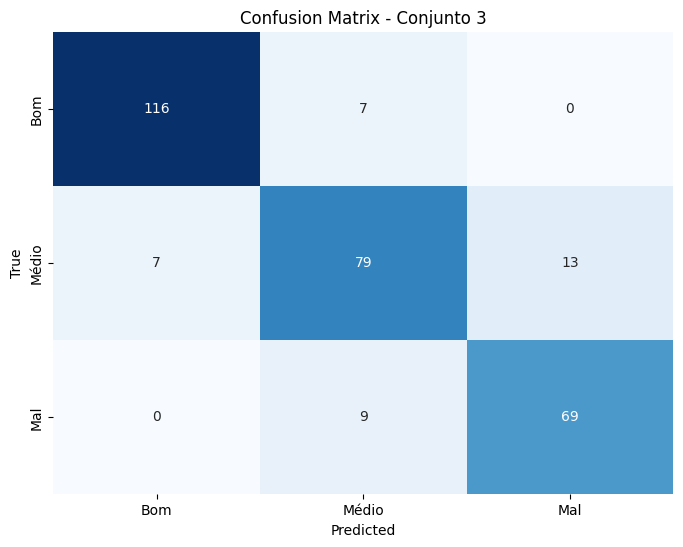

Acurácia no conjunto de teste: 88.00%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bom       0.94      0.94      0.94       123
       Medio       0.83      0.80      0.81        99
        Ruim       0.84      0.88      0.86        78

    accuracy                           0.88       300
   macro avg       0.87      0.88      0.87       300
weighted avg       0.88      0.88      0.88       300


----------------------------------------------------------------

Eficácia do conjunto 4


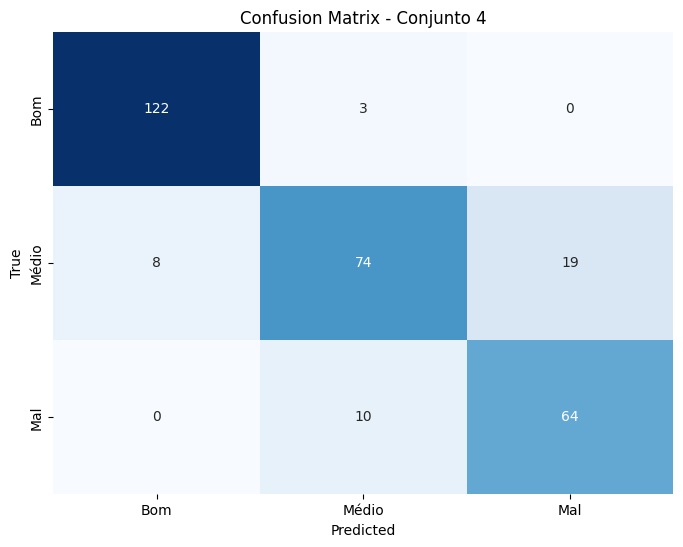

Acurácia no conjunto de teste: 86.67%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bom       0.94      0.98      0.96       125
       Medio       0.85      0.73      0.79       101
        Ruim       0.77      0.86      0.82        74

    accuracy                           0.87       300
   macro avg       0.85      0.86      0.85       300
weighted avg       0.87      0.87      0.86       300


----------------------------------------------------------------

Eficácia do conjunto 5


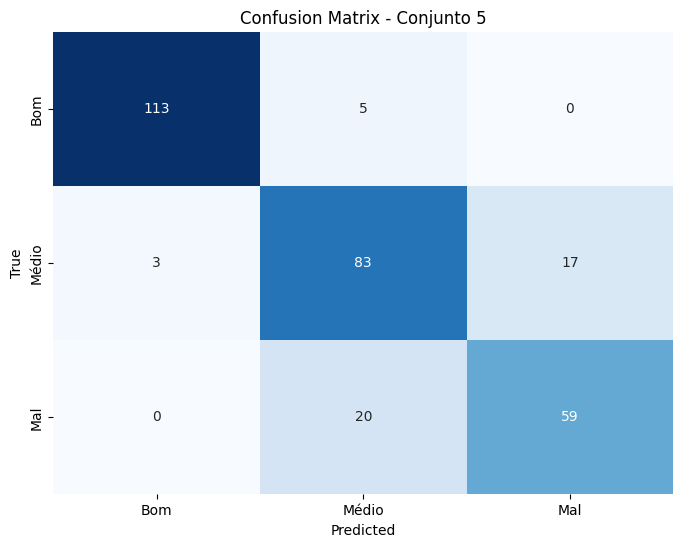

Acurácia no conjunto de teste: 85.00%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bom       0.97      0.96      0.97       118
       Medio       0.77      0.81      0.79       103
        Ruim       0.78      0.75      0.76        79

    accuracy                           0.85       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.85      0.85      0.85       300


----------------------------------------------------------------

Eficácia do conjunto 6


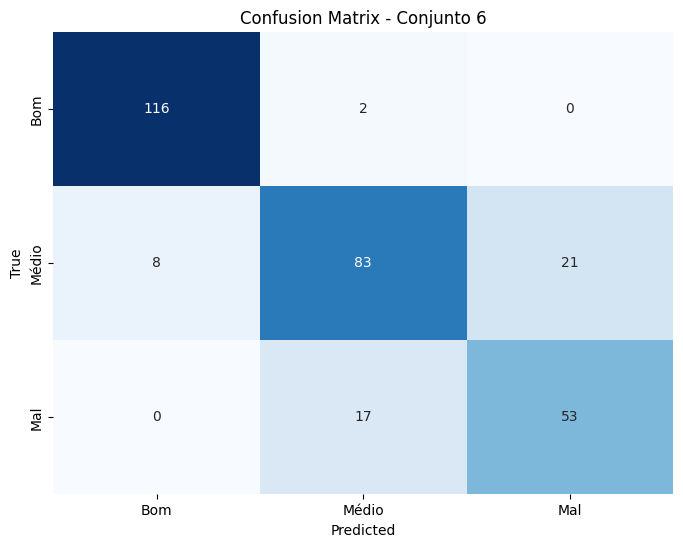

Acurácia no conjunto de teste: 84.00%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bom       0.94      0.98      0.96       118
       Medio       0.81      0.74      0.78       112
        Ruim       0.72      0.76      0.74        70

    accuracy                           0.84       300
   macro avg       0.82      0.83      0.82       300
weighted avg       0.84      0.84      0.84       300


----------------------------------------------------------------

Eficácia do conjunto 7


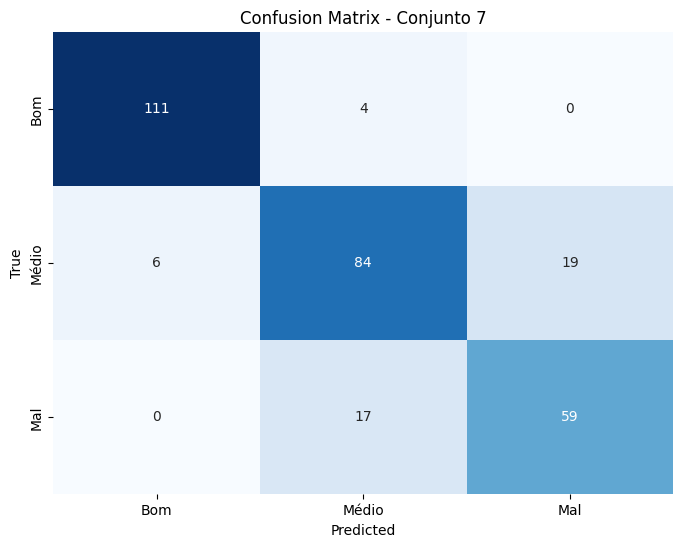

Acurácia no conjunto de teste: 84.67%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bom       0.95      0.97      0.96       115
       Medio       0.80      0.77      0.79       109
        Ruim       0.76      0.78      0.77        76

    accuracy                           0.85       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.85      0.85      0.85       300


----------------------------------------------------------------

Eficácia do conjunto 8


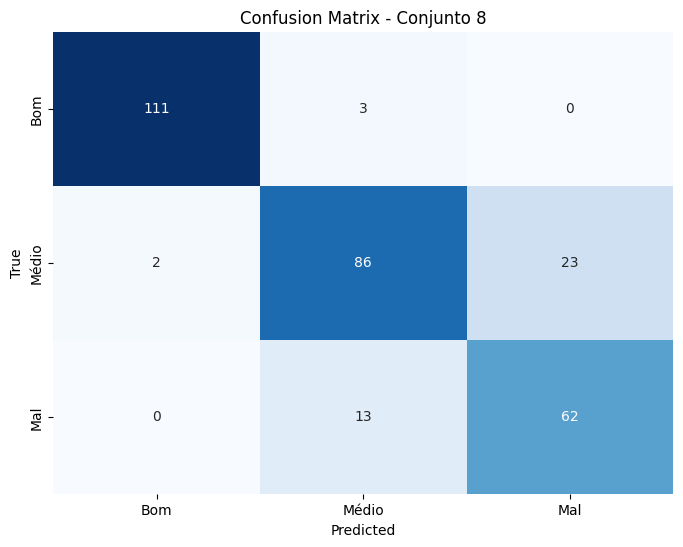

Acurácia no conjunto de teste: 86.33%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bom       0.98      0.97      0.98       114
       Medio       0.84      0.77      0.81       111
        Ruim       0.73      0.83      0.77        75

    accuracy                           0.86       300
   macro avg       0.85      0.86      0.85       300
weighted avg       0.87      0.86      0.86       300


----------------------------------------------------------------

Eficácia do conjunto 9


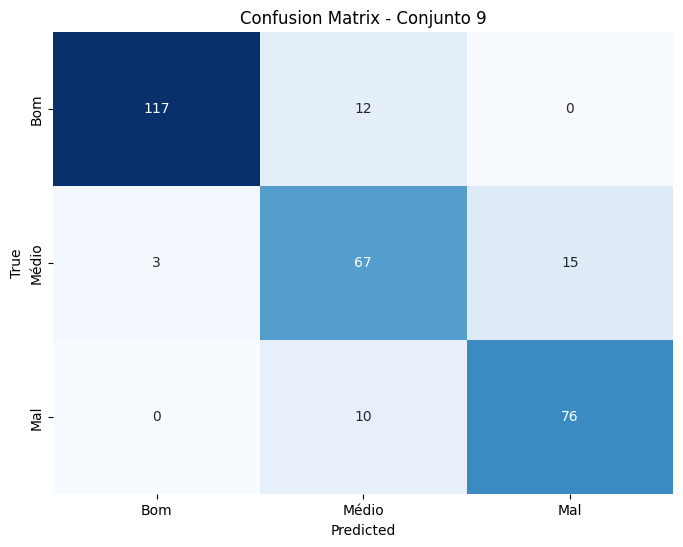

Acurácia no conjunto de teste: 86.67%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bom       0.97      0.91      0.94       129
       Medio       0.75      0.79      0.77        85
        Ruim       0.84      0.88      0.86        86

    accuracy                           0.87       300
   macro avg       0.85      0.86      0.86       300
weighted avg       0.87      0.87      0.87       300


----------------------------------------------------------------

Eficácia do conjunto 10


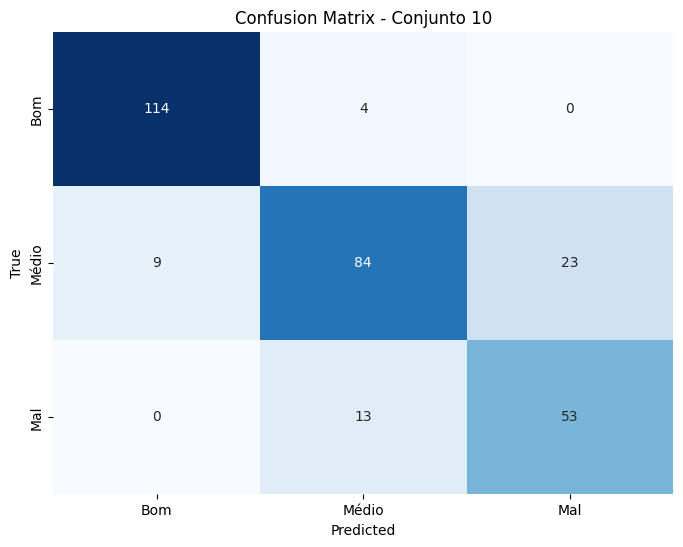

Acurácia no conjunto de teste: 83.67%

Relatório de Classificação:
              precision    recall  f1-score   support

         Bom       0.93      0.97      0.95       118
       Medio       0.83      0.72      0.77       116
        Ruim       0.70      0.80      0.75        66

    accuracy                           0.84       300
   macro avg       0.82      0.83      0.82       300
weighted avg       0.84      0.84      0.84       300


----------------------------------------------------------------



In [7]:
print("----------------------------------------------------------------")
# List to store average accuracies for each conjunto
average_accuracies = []
for i in range(conjuntos):
    print(f'Eficácia do conjunto {i + 1}')
    X_test = X_test_array[i]
    y_test = y_test_array[i]

    # Load the trained model for the current dataset
    naiveBayes = best_models[i]

    # Make predictions on the test set
    y_pred = naiveBayes.predict(X_test)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Bom', 'Médio', 'Mal'], yticklabels=['Bom', 'Médio', 'Mal'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Conjunto {i + 1}')
    plt.show()

      # Calculate and print accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Append accuracy to the list
    average_accuracies.append(accuracy)
    
    print(f'Acurácia no conjunto de teste: {accuracy * 100:.2f}%\n')


    # Print classification report
    classification_rep = classification_report(y_test, y_pred)
    print(f'Relatório de Classificação:\n{classification_rep}')
    

    print('\n----------------------------------------------------------------\n')

In [8]:
# Find the index of the conjunto with the highest average accuracy
best_conjunto_index = np.argmax(average_accuracies)

# Print the conjunto with the highest average accuracy
print(f"\nO conjunto {best_conjunto_index + 1} obteve os melhores resultados.")


O conjunto 3 obteve os melhores resultados.


# 2) Experimentando as melhores configurações de parametros

## OBS: Pegando um conjunto aleatorio entre os 10 


In [9]:
conjunto_aleatorio = random.randint(0, 9)

# Print the conjunto with the highest average accuracy
print(f"\nO conjunto {conjunto_aleatorio + 1} será utilizado para o teste de parâmetros")


O conjunto 7 será utilizado para o teste de parâmetros


## 2.1) Carregar os dados de treinamento e teste

In [10]:
# MUDAR ISSO -> ESCOLHER UM NUMERO ENTRE 1 A 10 E PEGAR AQUELE CONJUNTO

X_train = X_train_array[conjunto_aleatorio]
y_train = y_train_array[conjunto_aleatorio]
X_test = X_test_array[conjunto_aleatorio]
y_test = y_test_array[conjunto_aleatorio]


## 2.2) Treinando modelo 

In [11]:
param_grid = {
    'priors': [None, [0.3, 0.4, 0.3], [0.2, 0.6, 0.2], [0.4, 0.3, 0.3]],
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

model = GaussianNB()

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'priors': [None, [0.3, 0.4, 0.3], [0.2, 0.6, 0.2],
                                    [0.4, 0.3, 0.3]],
                         'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]},
             return_train_score=True, scoring='accuracy')

## 2.3) Analisando todas combinações

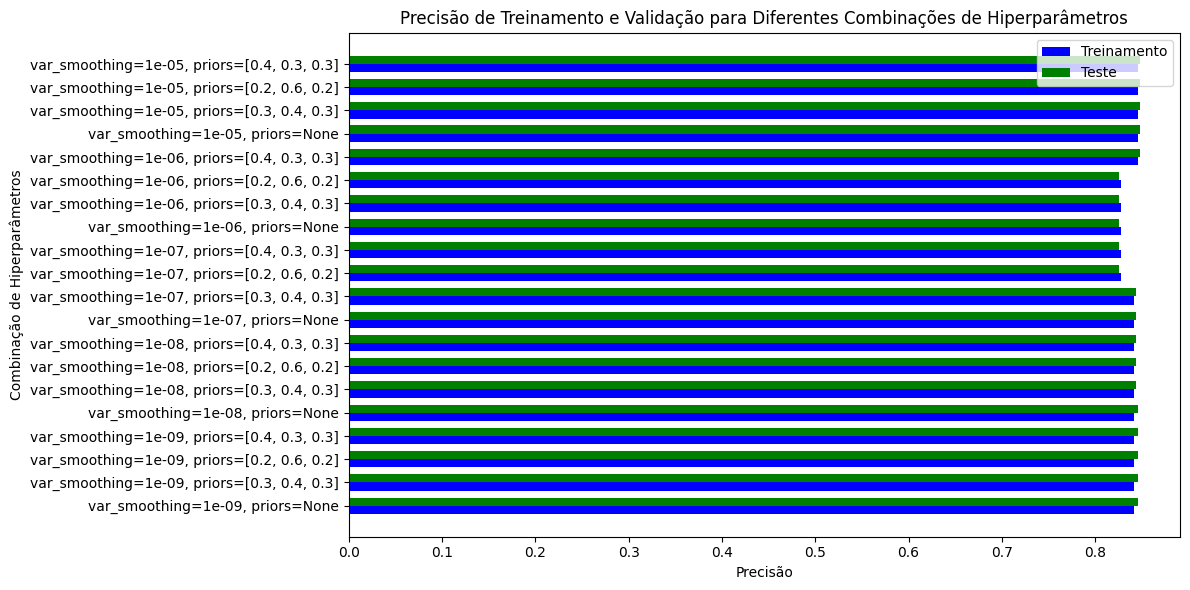

In [12]:
results = grid_search.cv_results_

param_combinations = [f'var_smoothing={var_smoothing}, priors={priors}' 
                      for var_smoothing in param_grid['var_smoothing'] 
                      for priors in param_grid['priors']]

train_scores = results['mean_train_score']

validations_scores = results['mean_test_score']

y_indices = np.arange(len(param_combinations))

bar_height = 0.35

plt.figure(figsize=(12, 6))
plt.barh(y_indices, train_scores, height=bar_height, label='Treinamento', color='b', align='center')
plt.barh(y_indices + bar_height, validations_scores, height=bar_height, label='Teste', color='g', align='center')

plt.ylabel('Combinação de Hiperparâmetros')
plt.xlabel('Precisão')
plt.title('Precisão de Treinamento e Validação para Diferentes Combinações de Hiperparâmetros')
plt.yticks(y_indices + bar_height / 2, param_combinations)
plt.legend()
plt.tight_layout()

plt.show()

## 2.4) Analisando Cada combinação para var_smoothing

In [13]:

# # Extrair os resultados do GridSearchCV
# results = grid_search.cv_results_

# # Valores únicos de var_smoothing
# var_smoothing_values = param_grid['var_smoothing']

# # Precisões obtidas no treinamento (média de validação cruzada)
# train_scores = results['mean_train_score']

# # Precisões obtidas no teste (média de validação cruzada)
# test_scores = results['mean_test_score']

# # Número de combinações de hiperparâmetros
# n_combinations = len(param_grid['priors']) * len(var_smoothing_values)

# # Largura das barras
# bar_width = 0.35

# # Loop para criar gráficos separados para cada var_smoothing
# for i, var_smoothing in enumerate(var_smoothing_values):
#     plt.figure(figsize=(12, 6))
    
#     # Índices para o eixo x
#     x_indices = np.arange(len(param_grid['priors']))
    
#     # Precisões correspondentes de treinamento e teste para este var_smoothing
#     train_scores_var_smoothing = train_scores[i::n_combinations]
#     test_scores_var_smoothing = test_scores[i::n_combinations]
    
#     # Rótulos para as combinações de hiperparâmetros
#     labels = [f'priors={priors}' for priors in param_grid['priors']]
    
#     plt.bar(x_indices, train_scores_var_smoothing, width=bar_width, label='Treinamento', color='b', align='center')
#     plt.bar(x_indices + bar_width, test_scores_var_smoothing, width=bar_width, label='Teste', color='g', align='center')
    
#     plt.xlabel('Combinação de Hiperparâmetros')
#     plt.ylabel('Precisão')
#     plt.title(f'Precisão de Treinamento e Teste para var_smoothing={var_smoothing}')
#     plt.xticks(x_indices + bar_width / 2, labels, rotation=45)
#     plt.legend()
#     plt.tight_layout()

#     plt.show()

### 2.5) Tabela comparativa para todas combinações

In [14]:
results = grid_search.cv_results_
param_combinations = [f'{params}' for params in grid_search.cv_results_['params']]
train_scores = results['mean_train_score']
test_scores = results['mean_test_score']

table_data = []

for i in range(len(param_combinations)):
    row = [i+1, param_combinations[i], train_scores[i], test_scores[i]]
    table_data.append(row)

table = tabulate(table_data, headers=['Combinação', 'Hiperparâmetros', 'Train Score', 'Validation Score'], tablefmt='fancy_grid', numalign='left')

print(table)

# # Crie um DataFrame a partir dos dados da tabela
# df = pd.DataFrame(table_data, columns=['Combinação', 'Hiperparâmetros', 'Train Score', 'Validation Score'])

# # Salve o DataFrame em um arquivo CSV
# df.to_csv('resultados.csv', index=False)  # Isso salvará os dados em um arquivo CSV chamado 'resultados.csv'

╒══════════════╤═════════════════════════════════════════════════════╤═══════════════╤════════════════════╕
│ Combinação   │ Hiperparâmetros                                     │ Train Score   │ Validation Score   │
╞══════════════╪═════════════════════════════════════════════════════╪═══════════════╪════════════════════╡
│ 1            │ {'priors': None, 'var_smoothing': 1e-09}            │ 0.841429      │ 0.845714           │
├──────────────┼─────────────────────────────────────────────────────┼───────────────┼────────────────────┤
│ 2            │ {'priors': None, 'var_smoothing': 1e-08}            │ 0.841429      │ 0.845714           │
├──────────────┼─────────────────────────────────────────────────────┼───────────────┼────────────────────┤
│ 3            │ {'priors': None, 'var_smoothing': 1e-07}            │ 0.841429      │ 0.845714           │
├──────────────┼─────────────────────────────────────────────────────┼───────────────┼────────────────────┤
│ 4            │ {'priors': 

## 2.6) Predição para o melhor modelo

In [15]:
best_naive_bayes = grid_search.best_estimator_

y_pred = best_naive_bayes.predict(X_test)

## 2.7) Matriz Confusão

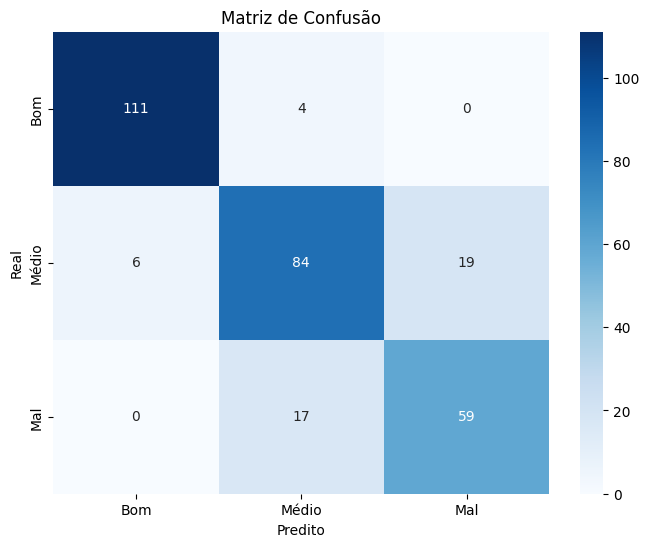

In [16]:
cm = confusion_matrix(y_test, y_pred)  

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Bom', 'Médio', 'Mal'], yticklabels=['Bom', 'Médio', 'Mal'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

## 2.8) Métricas de eficácia

In [17]:
print(f'Melhores Hiperparâmetros Encontrados: {grid_search.best_params_}')

print("----------------------------------------------------------------\n")
classification_rep = classification_report(y_test, y_pred)
print(f'Relatório de Classificação:\n{classification_rep}')

print("----------------------------------------------------------------\n")
accuracy = accuracy_score(y_test, y_pred)  
print(f'Acurácia: {accuracy}')

precision = precision_score(y_test, y_pred, average='weighted')  # Substitua y_test e y_pred pelos seus dados reais e previstos
print(f'Precisão: {precision}')

recall = recall_score(y_test, y_pred, average='weighted')  # Substitua y_test e y_pred pelos seus dados reais e previstos
print(f'Recall: {recall}')

f1 = f1_score(y_test, y_pred, average='weighted')  # Substitua y_test e y_pred pelos seus dados reais e previstos
print(f'Medida F: {f1}')

Melhores Hiperparâmetros Encontrados: {'priors': [0.4, 0.3, 0.3], 'var_smoothing': 1e-09}
----------------------------------------------------------------

Relatório de Classificação:
              precision    recall  f1-score   support

         Bom       0.95      0.97      0.96       115
       Medio       0.80      0.77      0.79       109
        Ruim       0.76      0.78      0.77        76

    accuracy                           0.85       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.85      0.85      0.85       300

----------------------------------------------------------------

Acurácia: 0.8466666666666667
Precisão: 0.8459658119658119
Recall: 0.8466666666666667
Medida F: 0.8461565437999534
